In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

### Multivariable Regression

This is basically an extended version of Simple Linear Regression. The equation I showed at the beginning is practically implemented here:

$$
y = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n + \epsilon
$$

Also written as:

$$
f(w,b) = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n + \epsilon
$$

Here, our data will actually have multiple features or simply put, multiple input values that will relate to give a single output. For example, in house price prediction, last time we only used "AREA" as our feature in determining the price of a given house, but here we might relate the house's price with how old it is, the area, the number of bedrooms, whether it has a pool or not, etc. So here, the price of our house becomes dependent on multiple independent variables. This is a good time to understand the matrix way of representing this:

The general linear regression model can be expressed as:

$$
\mathbf{y} = \mathbf{X}\mathbf{w} + b + \epsilon
$$

#### Where:

- $ \mathbf{X} $ is the $ m \times n $ matrix of input features (with $ m $ examples and $ n $ features):
  $$
  \mathbf{X} = \begin{pmatrix}
  x_{11} & x_{12} & \cdots & x_{1n} \\
  x_{21} & x_{22} & \cdots & x_{2n} \\
  \vdots & \vdots & \ddots & \vdots \\
  x_{m1} & x_{m2} & \cdots & x_{mn}
  \end{pmatrix}
  $$

- $ \mathbf{w} $ is the $ n \times 1 $ vector of weights (coefficients):
  $$
  \mathbf{w} = \begin{pmatrix}
  w_1 \\
  w_2 \\
  \vdots \\
  w_n
  \end{pmatrix}
  $$

- $ b $ is the scalar intercept (bias term).
- $ \mathbf{y} $ is the $ m \times 1 $ vector of observed outputs:
  $$
  \mathbf{y} = \begin{pmatrix}
  y_1 \\
  y_2 \\
  \vdots \\
  y_m
  \end{pmatrix}
  $$

- $ \hat{\mathbf{y}} $ is the $ m \times 1 $ vector of predicted outputs:
  $$
  \hat{\mathbf{y}} = \begin{pmatrix}
  \hat{y}_1 \\
  \hat{y}_2 \\
  \vdots \\
  \hat{y}_m
  \end{pmatrix}
  $$

- $ \epsilon $ is the $ m \times 1 $ vector of errors (residuals):
  $$
  \epsilon = \begin{pmatrix}
  \epsilon_1 \\
  \epsilon_2 \\
  \vdots \\
  \epsilon_m
  \end{pmatrix}
  $$

#### If you can't spot it, here we use the same symbols in capital.

### More Compact Form:
$$
\hat{\mathbf{y}} = \mathbf{X}\mathbf{w} + b
$$

For convenience, the bias term $ b $ can be incorporated into the feature matrix by adding a column of ones to $ \mathbf{X} $ and extending $ \mathbf{w} $ to include the bias term. This gives:
$$
\hat{\mathbf{y}} = \mathbf{X}'\mathbf{w}'
$$

where $ \mathbf{X}' $ is the $ m \times (n+1) $ matrix with a column of ones prepended to $ \mathbf{X} $:
$$
\mathbf{X}' = \begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1n} \\
1 & x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \cdots & x_{mn}
\end{pmatrix}
$$

and $ \mathbf{w}' $ is the $ (n+1) \times 1 $ vector of weights including the bias:
$$
\mathbf{w}' = \begin{pmatrix}
b \\
w_1 \\
w_2 \\
\vdots \\
w_n
\end{pmatrix}
$$

###### The operation being performed between $ \mathbf{W} $ and $ \mathbf{X} $ is a dot product (in the case of 1-dimensional matrix called vectors) and matrix multiplication (for higher-dimensional matrices).

As now, we will have to implement all the functions we did last time but keeping the multiple features (x) and weights (W) in mind. Understanding the matrix representation and matrix-related operations is necessary to grasp linear regression to its fullest, so I recommend you learn about them. Here, I will just be implementing the code to perform the regression.



In [3]:
#Let's load some data

X_train = np.array([[2104, 5, 1, 45], 
                    [1416, 3, 2, 40], 
                    [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

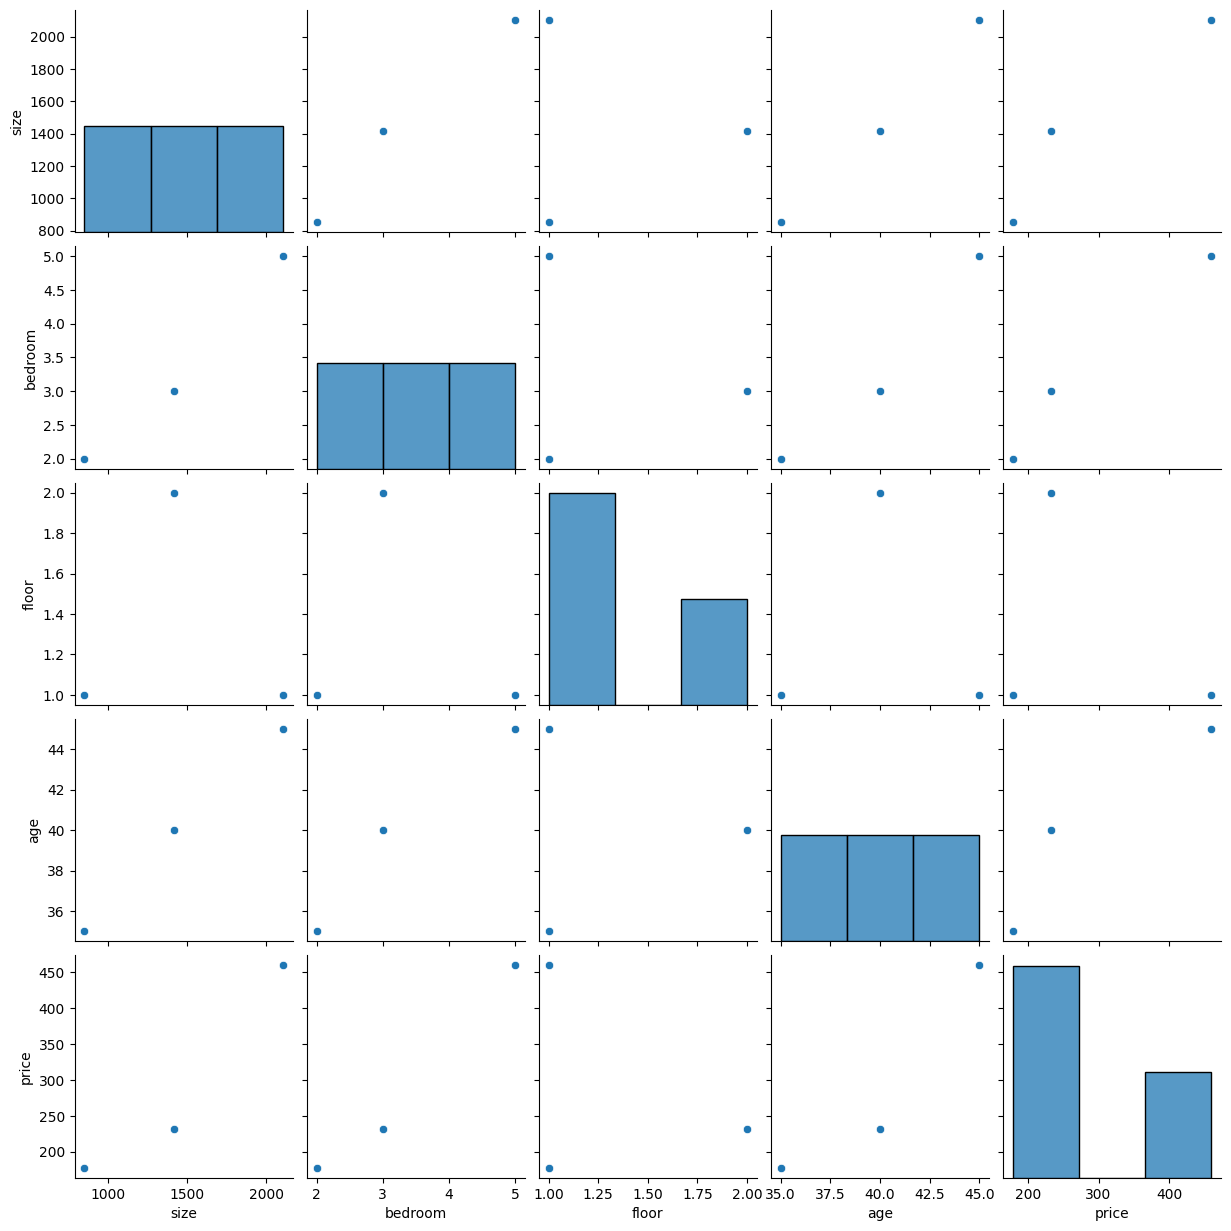

In [4]:
#Now Let's visualize the data
data = pd.DataFrame(X_train,columns = ['size','bedroom','floor','age'])
data['price'] = y_train
sns.pairplot(data)
plt.show()

#### Now in the above pair plot, the key thing to notice is the bottom row, which gives us information about how the price of a house varies with each variable.
The price of a house is higher if it has more bedrooms, more floors, and is larger in size; the older the house, the better. From the graph, we can understand that all these variables individually vary linearly with price.

i.e.,
$$
\text{price} \propto \text{size}
$$

$$
\text{price} \propto \text{number of bedrooms}
$$

$$
\text{price} \propto \text{number of floors}
$$

$$
\text{price} \propto \text{age of the house}
$$

So, our $ f(w,b) $ will be:
$$ 
f(w,b) = b + w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + w_4 \cdot x_4 
$$

Which via the matrix notation above:
$$
\hat{\mathbf{y}} = \mathbf{X} \mathbf{w} + b
$$

For our specific data, where:
$$
\mathbf{X} = \begin{pmatrix}
2104 & 5 & 1 & 45 \\
1416 & 3 & 2 & 40 \\
852 & 2 & 1 & 35
\end{pmatrix}
$$

$$
\mathbf{w} = \begin{pmatrix}
w_1 \\
w_2 \\
w_3 \\
w_4
\end{pmatrix}
$$

$$
b = b
$$

The model can be expressed as:
$$
\hat{\mathbf{y}} = \begin{pmatrix}
2104 & 5 & 1 & 45 \\
1416 & 3 & 2 & 40 \\
852 & 2 & 1 & 35
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2 \\
w_3 \\
w_4
\end{pmatrix} + b
$$

Therefore, for each data point, the prediction $ \hat{y} $ is:
$$
\hat{y}_1 = 2104 \cdot w_1 + 5 \cdot w_2 + 1 \cdot w_3 + 45 \cdot w_4 + b
$$

$$
\hat{y}_2 = 1416 \cdot w_1 + 3 \cdot w_2 + 2 \cdot w_3 + 40 \cdot w_4 + b
$$

$$
\hat{y}_3 = 852 \cdot w_1 + 2 \cdot w_2 + 1 \cdot w_3 + 35 \cdot w_4 + b
$$

Now, first we need to implement the function to compute the $ \hat{y} $ value for random $ w $ and $ b $ that we will assign to this model initially. Then, we need to compute the MSE and use the Gradient Descent Algorithm to find the optimal $ w $ and $ b $.

(As our dataset is very small, the points may just seem random, but for large amounts of data with higher dimensions, this is one of the preferred ways to analyze the data. We will understand more about these in EDA. Additionally, you can see this getting complicated with large amounts of data with N dimensions.)


In [5]:
def compute_model_output_slower(X,W,b):
    """
    This function takes the value of input training data, and found the output for a give set
    of W and b.

    Args:
        X (ndarray) : input data
        W (ndarray) : weight for the input parameters
        b (scalar)  : intercept or bias term

    Returns:
        yhat (ndarray) : Output values
    """


    # Now there are 2 way to compute the X dot W product, one via the loop which looks like this
    m =  X.shape[0] #number of samples (or number of rows)
    n = X.shape[1] #number of features (or number of columns)
    yhat = np.zeros(m)
    for i in range(m):
        prediction = b
        for j in range(n):
            prediction += W[j] * X[i,j]
        yhat[i] += prediction
    
    return yhat

# Now this way works but is a lot slower for large amounts of data. Here we can use the power of numpy arrays by calling a function called np.dot().
# The dot function automatically performs dot product or normal matrix multiplication, whichever is required.

def compute_model_output_faster(X,W,b):
    """
    This function takes the value of input training data, and found the output for a give set
    of W and b.

    Args:
        X (ndarray) : input data
        W (ndarray) : weight for the input parameters
        b (scalar)  : intercept or bias term

    Returns:
        yhat (ndarray) : Output values
    """

    yhat = np.dot(X, W) + b  # This computes the Dot product and adds the b value to each prediction (like shown above)
    return yhat

In [6]:
#let's compute the Mean Squared Error (it remains pretty much the same)
def compute_cost_MSE(X, Y, W, b):
    """
    This function computes the Mean Squared Error (MSE) 
    of our model on the training data.

    Args:
        X (ndarray): Input values
        Y (ndarray): Actual values or target values
        W (ndarray): Weights for the input parameters
        b (scalar): Intercept or bias term

    Returns:
        total_cost (float): The Mean Squared Error (MSE)
    """

    yhat = compute_model_output_faster(X, W, b)  # Computing the predictions

    m = yhat.shape[0]
    cost = 0.0

    for i in range(m):
        cost += (yhat[i] - Y[i]) ** 2 
    total_cost = cost / (2 * m)

    return total_cost

In [7]:
#let's Test these functions then we shall procced to making the gradient function and gradient descent algorithm

# initialize parameters
w = np.array([0.1,0.2,0.2,0.3])
b = 0.2

yhat = compute_model_output_faster(X = X_train,W = w, b = b)
print("Predictions made by the model: ",yhat)
print("target values: ",y_train)

print("Mean Squared Error: ", compute_cost_MSE(X=X_train,Y=y_train,W = w,b=b))

Predictions made by the model:  [225.3 154.8  96.5]
target values:  [460 232 178]
Mean Squared Error:  11281.03


In [8]:
def compute_gradient(X,Y,W,b):
    """
    This function computes the Gradient of cost fuction
    for a given set of w and b values.

    Args:
        X (ndarray) : Training Input values
        Y (ndarray) : Target value or (output values for the input)    
        W (ndarray) : slope or wrights for the input parameter
        b (scalar) : intercept or bias parameter

    Returns:
        dj_dw (ndarray) : gradient when partially diffrentiated wrt w
        dj_db (ndarray) : gradient when partially diffrentiated wrt b
    """
        
    m,n = X.shape
    dj_dw = np.zeros(n,)
    dj_db = 0.0
    for i in range(m):
        err = (np.dot(X[i],W) + b) - Y[i]
        for j in range(n):
            dj_dw[j] += err *  X[i,j]
        dj_db += err 

    dj_dw /= m
    dj_db /= m

    return dj_dw,dj_db



#### Now let's understand the Compute Gradient

This time, we have multiple values of 𝑊 corresponding to each feature in the input data. We need to calculate the gradient for each feature individually.

In the code below, we first create a `dj_dw` array that will store the derivative of the Mean Squared Error (MSE) with respect to 𝑊. This array is initialized to zeros with a size equal to the number of features (similarly for 𝑏, which remains a scalar). We then compute the error for each sample or input row and multiply that error by the elements or features of that row. The computation for 𝑏 remains the same.

$$ \text{err} = (\mathbf{X}[i] \cdot \mathbf{W} + b) - Y[i] $$

Here, $ \mathbf{X}[i] $ represents the i-th row of the input matrix $ \mathbf{X} $, which is multiplied by the weight vector $ \mathbf{W} $. Each element of $ \mathbf{X}[i] $ corresponds to a feature in the input data.

- `for (i) in range(m):` The outer loop iterates over each sample in the dataset.
- `for (j) in range(n):` The inner loop iterates over each feature in the input data $ \mathbf{X}[i] $.

Inside this loop, we calculate `dj_dw[j] += err * X[i, j]`, which accumulates the derivative of MSE with respect to $ W[j] $ for each feature $ j $. Here, $ X[i, j] $ denotes the j-th feature of the i-th sample in the input data $ \mathbf{X} $. This calculates the change required in each feature to achive the lowest MSE.

The computation for 𝑏 remains straightforward and is not affected by the number of features.




In [9]:
def gradient_descent(X, Y, W_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    This Function performs the Gradient descent algorithms i.e it updates the 
    values of w and b to reach the optimal values.

    Args:
        X (ndarray) : Training Input values
        Y (ndarray) : Target value or (output values for the input)    
        W_int (ndarray) : slope parameter (initial value)
        b_int (scalar) : intercept or bias parameter (initial value)
        alpha (scalar) : Learning Rate
        num_iters (scalar) : number of iterations
        compute_loss_function (function) : function to call cost function ro MSE
        gradient_function ( function) : function to call compute_gradient function

    Returns:
        W (ndarray): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        J_history (List): History of cost values
        p_history (list): History of parameters [w,b]
    """

    W = copy.deepcopy(W_in)
    b = b_in

    Jwb_hist = []  # stores how the value of J(w,b) changes over time
    Wb_hist = []  #stores the value of W,b as it changes over time
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, Y, W, b)

        # updating the parameters
        b = b - alpha * dj_db
        W = W - alpha * dj_dw

        # saving cost J at each iteration
        if i < 100000:  # Limiting history to save memory
            Jwb_hist.append(cost_function(X, Y, W, b))
            Wb_hist.append((W,b))


        # Print cost every at about intervals 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {Jwb_hist[-1]:0.2e} ", 
                  f"dj_dw: {dj_dw} ", 
                  f"dj_db: {dj_db: 0.3e}  ", 
                  f"W: {W} ", 
                  f"b: {b: 0.5e}")
            
    return W, b, Jwb_hist,Wb_hist



Iteration    0: Cost 6.53e+03  dj_dw: [-235708.2     -502.98    -239.25   -3799.1 ]  dj_db: -1.373e+02   W: [0.12357082 0.2000503  0.20002393 0.30037991]  b:  2.00014e-01
Iteration   10: Cost 4.72e+02  dj_dw: [-1.25220509e+04 -3.01693902e+01 -8.53749112e+00 -1.47416518e+01]  dj_db: -4.576e+00   W: [0.18899376 0.20019254 0.20008715 0.30129163]  b:  2.00050e-01
Iteration   20: Cost 4.55e+02  dj_dw: [-668.23715894   -5.05882269    3.71625917  186.17961592]  dj_db:  2.472e+00   W: [0.19247166 0.20020355 0.20008634 0.30115305]  b:  2.00049e-01
Iteration   30: Cost 4.55e+02  dj_dw: [-38.65884161  -3.7263984    4.36727703 196.77820917]  dj_db:  2.845e+00   W: [0.19265955 0.20020759 0.20008212 0.30095877]  b:  2.00046e-01
Iteration   40: Cost 4.55e+02  dj_dw: [ -5.21958476  -3.65687302   4.4020531  197.26845572]  dj_db:  2.864e+00   W: [0.19267269 0.20021126 0.20007773 0.3007616 ]  b:  2.00043e-01
Iteration   50: Cost 4.55e+02  dj_dw: [ -3.44233183  -3.65442196   4.40409939 197.22185831]  dj_d

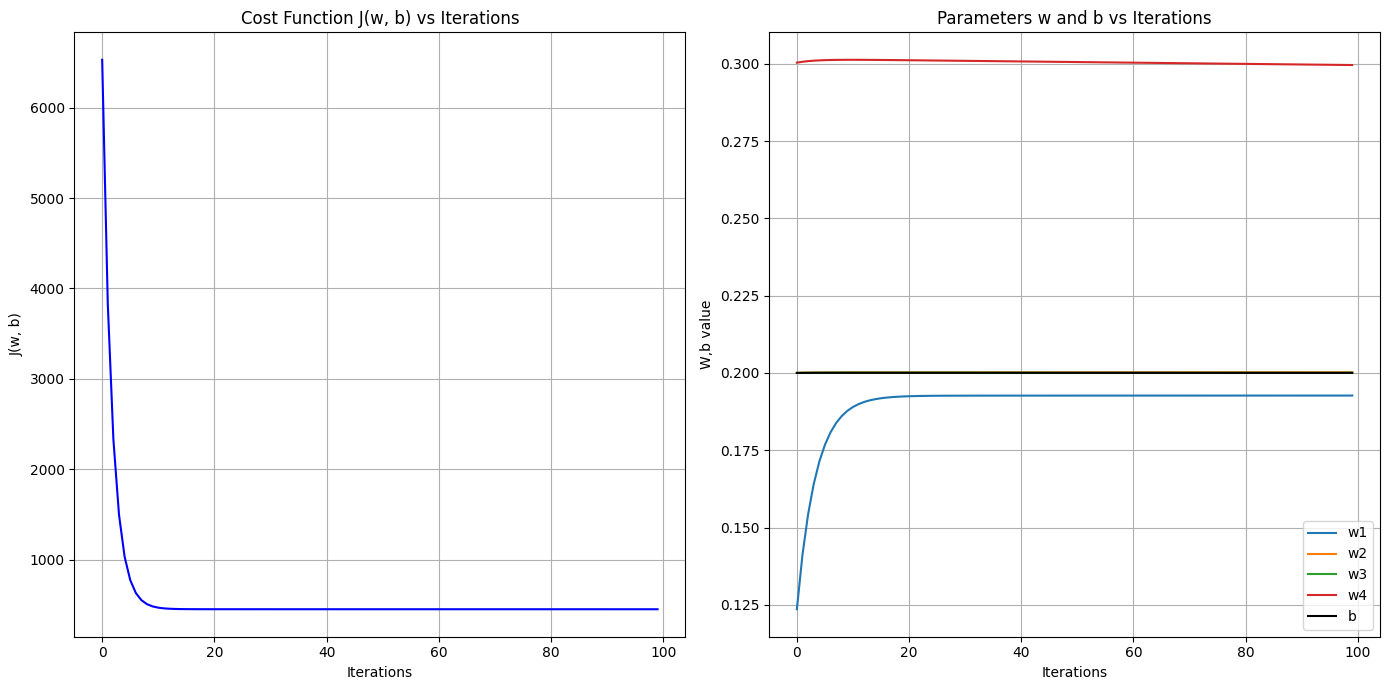

In [10]:
#Let's find the optimal value for W and b.
initial_w = np.array([0.1,0.2,0.2,0.3])
initial_b = 0.2
alpha = 1.0e-7
iterations = 100
X_train = np.array([[2104, 5, 1, 45], 
                    [1416, 3, 2, 40], 
                    [852, 2, 1, 35],
                    [1850, 4, 2, 20],
                    [1200, 3, 2, 30],
                    [1500, 3, 1, 25],
                    [2500, 4, 3, 10],
                    [1700, 4, 2, 15],
                    [900, 2, 1, 50],
                    [1100, 3, 1, 40]])

y_train = np.array([460, 232, 178, 350, 280, 300, 480, 360, 150, 200])

final_W,final_b,Jwb_history,Wb_history = gradient_descent(X_train,y_train,initial_w,initial_b,alpha,iterations,compute_cost_MSE,compute_gradient)
print(f"(w,b) found by gradient descent: {final_W},{final_b:8.4f}")

# Plot J(w, b) vs iterations
plt.figure(figsize=(14, 7))

# Plot cost function J(w, b) vs iterations
plt.subplot(1, 2, 1)
plt.plot(range(len(Jwb_history)), Jwb_history, color='blue')
plt.title('Cost Function J(w, b) vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('J(w, b)')
plt.grid(True)

# Plot w and b vs iterations
plt.subplot(1, 2, 2)
for i in range(final_W.shape[0]):
    plt.plot(range(len(Wb_history)), [p[0][i] for p in Wb_history], label=f'w{i+1}', color=f'C{i}')
plt.plot(range(len(Wb_history)), [p[1] for p in Wb_history], label='b', color='black')
plt.title('Parameters w and b vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('W,b value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
# Now let's compute the prediction made by our model by the new W and b Parameter
yhat = compute_model_output_faster(X_train,final_W,final_b)
print("Prediction made by our model: ",yhat)
print("Target values: ",y_train)

Prediction made by our model:  [420.30915658 286.03799954 175.46089748 363.87499411 241.42033367
 297.53017202 486.32947345 333.47305734 189.20414247 224.94697605]
Target values:  [460 232 178 350 280 300 480 360 150 200]


In [12]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error_train = mean_absolute_percentage_error(y_train,yhat)

print("% Error in predicting the traning data:  ", error_train)


% Error in predicting the traning data:   9.920997827142854


#### We have successfully implemented the Multivariable regression

#### Now let's move on to Polynomial Regression

In Polynomial Regression, we extend the idea of linear regression by allowing the relationship between the independent variables (input features) and the dependent variable (target) to be modeled as an nth-degree polynomial. This means our hypothesis function $ f(w, b) $ can take the form of a polynomial equation, such as:

$$ f(w, b) = w_0 + w_1 \cdot X + w_2 \cdot X^2 + \ldots + w_d \cdot X^d + b $$

Here:
- $ X $ represents the input variable or features.
- $ w_0, w_1, \ldots, w_d $ are the coefficients or weights associated with each term in the polynomial.
- $ b $ is the bias or intercept term.

### Example:
For instance, consider a scenario where we want to predict house prices based on the size of the house $ X $. A simple quadratic polynomial regression model might look like:

$$ \text{price} = w_0 + w_1 \cdot \text{size} + w_2 \cdot \text{size}^2 + b $$

Here:
- $ w_0 $ is the intercept (bias term).
- $ w_1 $ and $ w_2 $ are coefficients for the linear and quadratic terms of size, respectively.

Polynomial regression is a flexible technique that extends linear regression to capture more complex relationships in data. It allows us to model curves and bends in the data, making it suitable for scenarios where the relationship between inputs and output is non-linear.

---

### Now to actually implement the Polynomial Regression

We don't actually have to model our equation explicitly like shown above. Instead, we change our input data or the input features to polynomial features. This transformation can be done via a function in the `sklearn` library, but I have discussed what this function basically does.

What we need to do is simple: first, analyze the data to find what type of relation the variables follow with the target variables. Say you found it follows a quadratic sort of relation, then we will take the original data

$$ \text{Original Data Matrix: } X = \begin{bmatrix} x_{11} & x_{12} & \cdots & x_{1n} \\ x_{21} & x_{22} & \cdots & x_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ x_{m1} & x_{m2} & \cdots & x_{mn} \end{bmatrix} $$

and change it to

$$ \text{New Matrix with Polynomial Features: } X_{\text{poly}} = \begin{bmatrix} 1 & x_{11} & x_{11}^2 & x_{12} & x_{12}^2 & \cdots & x_{1n} & x_{1n}^2 \\ 1 & x_{21} & x_{21}^2 & x_{22} & x_{22}^2 & \cdots & x_{2n} & x_{2n}^2 \\ \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\ 1 & x_{m1} & x_{m1}^2 & x_{m2} & x_{m2}^2 & \cdots & x_{mn} & x_{mn}^2 \end{bmatrix} $$

Specifically, for our case with degree = 2, it would look like:

$$ \text{New Matrix with Polynomial Features: } X_{\text{poly}} = \begin{bmatrix} 1 & x_{11} & x_{11}^2 & x_{12} & x_{12}^2  \\ 1 & x_{21} & x_{21}^2 & x_{22} & x_{22}^2 \\ \vdots & \vdots & \vdots & \vdots & \vdots \\ 1 & x_{m1} & x_{m1}^2 & x_{m2} & x_{m2}^2 \end{bmatrix} $$

Here, each original feature is transformed into its polynomial features up to the specified degree. For instance, if the degree is 2, we include the feature itself and its square.

In our case while implementing the Multivariate Regression:-
$$ \text{Original Data Matrix: } X = \begin{bmatrix} 2104 & 5 & 1 & 45 \\ 1416 & 3 & 2 & 40 \\ 852 & 2 & 1 & 35 \end{bmatrix} $$

and change it to:

$$ \text{New Matrix with Polynomial Features: } X_{\text{poly}} = \begin{bmatrix} 1 & 2104 & 2104^2 & 5 & 5^2 & 1 & 1^2 & 45 & 45^2 \\ 1 & 1416 & 1416^2 & 3 & 3^2 & 2 & 2^2 & 40 & 40^2 \\ 1 & 852 & 852^2 & 2 & 2^2 & 1 & 1^2 & 35 & 35^2 \end{bmatrix} $$

###### Our original data does not follow a non-linear relationship, so trying to fit a polynomial curve to it won't result in an accurate model. Instead, we will generate synthetic data with a known non-linear relationship to better understand polynomial regression.

This transformation allows us to apply linear regression on the transformed dataset to capture non-linear relationships in the original data. This means none of our functions that we have implemented require any change.

###### Obviously, the function provided by sklearn does much more than just this and provides many more parameters to tweak things here and there.


Traning Data:  [[ 176.4052346    40.01572084]
 [  97.87379841  224.08931992]
 [ 186.75579901  -97.72778799]
 [  95.00884175  -15.13572083]
 [ -10.32188518   41.05985019]
 [  14.40435712  145.4273507 ]
 [  76.10377251   12.16750165]
 [  44.38632327   33.36743274]
 [ 149.40790732  -20.51582638]
 [  31.30677017  -85.40957393]
 [-255.29898158   65.36185954]
 [  86.44361989  -74.21650204]
 [ 226.9754624  -145.43656746]
 [   4.57585173  -18.718385  ]
 [ 153.27792144  146.93587699]
 [  15.49474257   37.81625196]
 [ -88.77857476 -198.07964682]
 [ -34.79121493   15.63489691]
 [ 123.02906807  120.23798488]
 [ -38.73268174  -30.23027506]
 [-104.85529651 -142.00179372]
 [-170.62701906  195.07753952]
 [ -50.96521818  -43.80743016]
 [-125.279536     77.74903558]
 [-161.38978476  -21.27402802]
 [ -89.54665612   38.69024979]
 [ -51.08051376 -118.06321841]
 [  -2.81822283   42.83318705]
 [   6.65172224   30.24718977]
 [ -63.43220937  -36.2741166 ]
 [ -67.24604478  -35.95531615]
 [ -81.3146282  -172.628

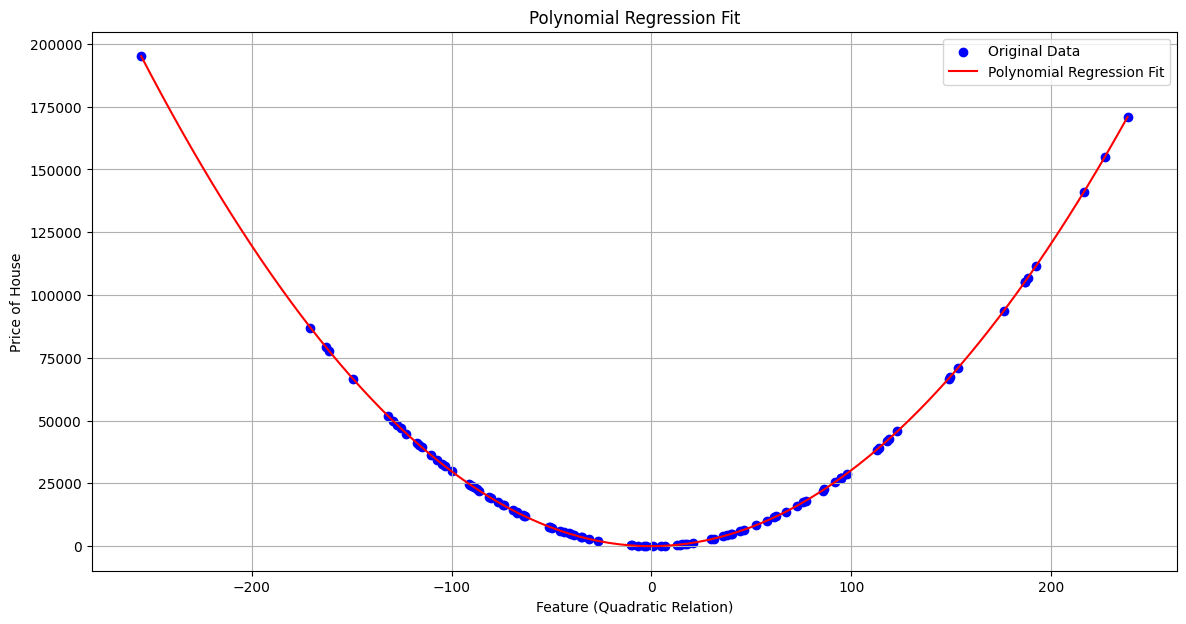

In [13]:
#Let's visualize this, i will be using the sklearn function here.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# creating synthetic data that follow a quadratic relation with target variable.
np.random.seed(0)
X_train = np.random.randn(100, 2) * 100
y_train = 3 * (X_train[:, 0]**2) + 2 * X_train[:, 0] + 5 + np.random.randn(100) * 50  # This here is equal to b + w1*x + w2*x^2 (if you know quadratic equations you will understand it's positioning in graph) 
                                                                                     # The last term is to introduce some random noise i.e variation in data.

#The quadratic equation is only for generating data.

print("Traning Data: ",X_train)
print("Target Data: ",y_train)

# Transforming the data to polynomial features
degree = 2
poly = PolynomialFeatures(degree) #SKlearn function to create polynomial features
X_poly = poly.fit_transform(X_train)


print("Polynomial transformed Data: ",X_poly)
# Fitting the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y_train)

# Visualizing the results for the feature with quadratic relationship
plt.figure(figsize=(14, 7))

# Plotting original data points
plt.scatter(X_train[:, 0], y_train, color='blue', label='Original Data')

# Predicting with the polynomial model
X_range = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100).reshape(-1, 1)
X_range_poly = poly.transform(np.hstack([X_range, np.zeros((X_range.shape[0], X_train.shape[1] - 1))]))
y_pred = model.predict(X_range_poly)

# Plotting the polynomial regression curve
plt.plot(X_range, y_pred, color='red', label='Polynomial Regression Fit')

plt.title('Polynomial Regression Fit')
plt.xlabel('Feature (Quadratic Relation)')
plt.ylabel('Price of House')
plt.legend()
plt.grid(True)
plt.show()


#I'll be experimenting further with this while working on projects to better understand sklearn functions and polynomial regression.

#### With this, I have completed the basics of Linear Regression, including multivariable and polynomial regression. Although we are still far from covering all the regression algorithms, we have built a strong foundation.
Our next goal will be to understand how to evaluate a model effectively and explore various standardization processes used to optimize the model better. This will include techniques like cross-validation, regularization, and other model assessment metrics. Additionally, we will delve into advanced topics such as ridge regression, lasso regression, and other specialized forms of regression to further enhance our understanding and capability in predictive modeling.
Additionally i will be learning and posting notes about regression models in more of a mathematical notation, and unique way to calculate the optiization parameters.

#### !!! I myself got confused between `Multivariable` and `Multivariate` Regression and initially titled this as multivariate. My apologies if you found anywhere written `"Multivariate"`; just know I mean `"Multivariable"`.

Now that we have learned about Multivariable and Multivariate regression, I will clarify the difference between the two:

Multivariable Regression: This extends simple linear regression by predicting one target variable dependent on multiple features (input values).

Multivariate Regression: This is similar to linear regression, but here there are multiple target variables that our model tries to simultaneously predict from multiple features.

